# CS-6570 Lecture 22 - TensorFlow

**Dylan Zwick**

*Weber State University*

**What is TensorFLow?**

TensorFlow is an open-source machine learning platform developed by Google that provides a powerful suite of tools for data scientists and developers to build, deploy, and train machine learning models. It was initially released in 2015, and has evolved significantly since. The TensorFlow library allows developers to create complex neural networks using a variety of programming languages, such as Python and JavaScript. Additionally, TensorFlow makes it easy to deploy models on mobile devices or cloud platforms like Google Cloud Platform (GCP) and Amazon Web Services (AWS).

TensorFlow is used in a variety of applications, ranging from natural language processing (NLP) and image recognition to predictive analytics and autonomous vehicle control. It can be used to train deep neural networks for object detection and classification, generate recommendations, classify images, and build voice-powered applications.

**What are Tensors?**

A tensor is, basically, an $n$-dimensional generalization of a matrix. A zero-dimensional tensor is a scalar, which contains a single value and has no axes. A one-dimensional tensor is a vector, which contains a list of values and has one axis. A two-dimensional tensor is a matrix that contains values stored across two axes.

<center>
    <div>
        <img src="Tensors.png" width="1000"/>
    </div>
</center>

**How Does TensorFlow Work?**

At the core of TensorFlow is a dataflow graph, which describes how data moves through a series of operations or transformations. The basic idea behind the dataflow graph is that operations are expressed as nodes, with each node performing a single operation on its inputs. The inputs and outputs of the operations are passed through edges (tensors). This makes it possible to break down complex computations into smaller, more manageable chunks.

TensorFlow also provides a number of tools for constructing and training neural networks. One of the most popular tools is the utility tf.keras, which allows users to quickly build and train deep learning models without having to write code from scratch. It also includes powerful visualization tools to help users understand the data and model parameters.

TensorFlow is also extensible, and it can be used with a variety of programming languages, including Python, C++, JavaScript, and Go. It also has support for running on GPUs (graphics processing units) for maximum performance.

Some important facts about TensorFlow:

* Its core is very similar to NumPy, but with GPU support.
* It supports distributed computing (across multiple devices and servers).
* It includes a kind of just-in-time (JIT) compiler that allows it to optimize computations for speed and memory usage. It works by extracting the *computation graph* from a Python function, then optimizing it, and finally running it efficiently.
* Computation graphs can be exported to a portable format, so you can train a TensorFlow model in one environment and run it in another.

TensorFlow offers many more features built on top of these core features: the most important is of course *tf.keras*, but it also has data loading and preprocessing ops (*tf.data*, *tf.io*, etc.), image processing ops (*tf.image*), signal processing ops (*tf.signal*), and more. We won't cover anywhere close to everything, so it's worth checking out the [documentation](https://www.tensorflow.org/).

At the lowest level, each TensorFlow operation (*op* for short) is implemented using highly efficient C++ code. Many operations have multiple implementations called *kernels*: each kernel is dedicated to a specific device type, such as CPUs, GPUs, or even TPUs (*tensor processing units*). As you may know, GPUs can dramatically speed up computations by splitting them into many smaller chunks and running them in parallel across many GPU threads. TPUs are even faster: they are custom ASIC chips build specifically for deep learning operations.

Most of the time your code will use the high-level APIs (especially *tf.keras* and *tf.data*); but when you need more flexibility, you can use the lower-level Python API, handling tensors directly. Note APIs for other languages are also available. In fact, TensorFlow runs not only in Windows, Linux, and macOS, but also on mobile devices, including both iOS and Android. There's even a JavaScript implementation called *TensorFlow.js* that makes is possible to run models directly in a browser!

**Using TensorFlow like Numpy**

TensorFlow's API revolves, appropriately, around *tensors*, which flow from operation to operation - thus the name. A tensor is very similar to a NumPy *ndarray*: it is usually a multidimensional array, but it can also hold a scalar. Let's see how to create a manipulate them.

In [11]:
#pip install tensorflor

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2023-11-21 21:54:19.673776: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 21:54:19.673860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 21:54:19.749757: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 21:54:19.921985: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 21:54:25.386749: W tensorflow/comp

In [13]:
a = np.array([2.,4.,5.])
t = tf.constant(a)
t.numpy()

array([2., 4., 5.])

In [14]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [15]:
np.square(t)

array([ 4., 16., 25.])

*Type Conversions*

Type conversions can significantly hurt performance, and they can easily go unnoticed when they are done automatically. To avoid this, TensorFlow does not perform any type conversions automatically: it just raises an exception if you try to execute an operation on tensors with incompatible types. For example, you cannot add a float tensor or an integer tensor, and you cannot even add a 32-bit float and a 64-bit float:

In [17]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 

In [30]:
tf.constant(2.) + tf.constant(40, dtype=tf.float64)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 

In [32]:
tf.constant(2.) + tf.constant(40, dtype=tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

**Variables**

The *tf.Tensor* values we've seen so far are immutable: you cannot modify them. This means that we cannot use regular tensors to implement weights in a neural network, since they need to be tweaked by backpropagation. Plus, other parameters may also need to change over time. What we need is a *tf.Variable*:

In [35]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

A *tf.Variable* acts much like a *tf.Tensor*: you can perform the same operations with it, it plays nicely with NumPy as well, and it is just as picky with types. But it can also be modified in place using the *assign()*, *assign_add()*, or *assign_sub()* methods, which increment or decrement the variable by the given value.

In [37]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [38]:
v[0,1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [39]:
v[:,2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In practice you will rarely have to create variables manually, since Keras provides an *add_weight()* method that will take care of it for you. Moreover, model parameters will generally be updated directly by the optimizers, so you will rarely need to update variables manually.

OK, so far TensorFlow looks a lot like NumPy, and that's by design. So what's something TensorFlow can do than NumPy can't? Well, with TensorFlow we can retrieve the gradient of any differentiable expression with respect to any of its inputs. This is done within something called a *GradientTape*:

In [42]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

This is most commonly used to retrieve the gradients of the loss of a model with respect to its weights.

**Example - A Linear Classifier**

Alright, using just what we've learned so far, we now know enough to build any machine learning model based on gradient descent. Woo hoo!

In a machine learning job interview, you may be asked to implement a linear classifier from scratch with TensorFlow. Let's see how we'd do that.

First, let's come up with some nicely linearly separable data to work with: two classes of points in a 2D plane. We'll generate each class of points by drawing their coordinates from a random distribution with a specific covariance matrix and a specific mean. We'll use the same covariance matrix for both clouds, but we'll use two different mean values.

In [47]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                   np.ones((num_samples_per_class, 1), dtype="float32")))

We can plot this data:

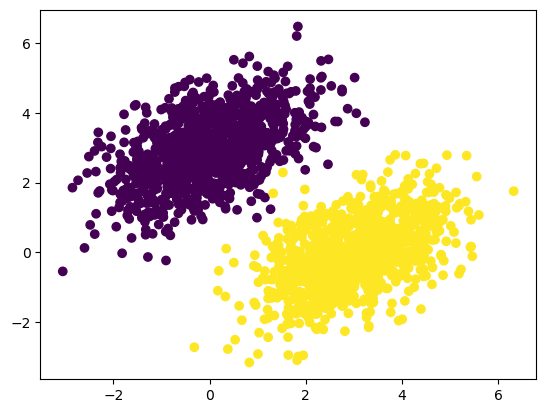

In [49]:
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

Now, let's create a linear classifier that can learn to separate these two blobs. A linear classifier is a model of the form:

<center>
    prediction = $\displaystyle W\textbf{x} + \textbf{b}$,
</center>

where $W$ is a matrix and $\textbf{b}$ is a vector. (Here $W$ stands for "weights" and $\textbf{b}$ stands for "bias".)

First, let's create our initial weights and biases, initialized with random values and zeros, respectively.

In [51]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Now, we'll create our forward pass function. Note that given how we've set it up, we'll want to have our inputs on the *left* of the multiplication and our outputs on the *right*.

In [88]:
def model(inputs):
    return tf.matmul(inputs, W) + b

Our linear classifier is operating on 2D inputs, and so $W$ is really just two scalar coefficients $w_{1}$ and $w_{2}$. Meanwhile, $b$ is just a single scalar coefficient. In other words, the prediction is:

<center>
    $\displaystyle w_{1}x_{1} + w_{2}x_{2} + b$.
</center>

We can change the index of the variables to be more "pythonic", and the labels for the inputs to reflect a 2D plane:

<center>
    $\displaystyle w_{0}x + w_{1}y + b$.
</center>

Alright, so now that we have our forward pass function, we'll also need our error function - how we measure how close our prediction was to the actual value. For this, we can use our old favorite, the square of the difference.

In [53]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

*Note* - What do we mean by "reduce_mean" here? Why isn't it just "mean"? Well, because for this operation TensorFlow computes the mean through a map-reduce operation in which the order of operations isn't always the same. This matters because for certain very high precision situations, doing the operations in a different order can lead to different rounding decisions and so different final outcomes. The name of the function is meant to make that explicit.

Alright, so now the final thing we need to do is handle the updates to our weight after a given batch. To do this, we can use TensorFlow to calculate the gradient of our loss with respect to our weights and biases, respectively, and then update our weights and biases accordingly with our learning rate.

In [54]:
learning_rate = .1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

Isn't that nice! That gradient function is pretty sweet.

Now, we just need to run our *training_step* function however many times we think we should. Let's try 42.

In [97]:
for step in range(42):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step+1}: {loss: .4f}")

Loss at step 1:  0.0277
Loss at step 2:  0.0274
Loss at step 3:  0.0272
Loss at step 4:  0.0270
Loss at step 5:  0.0268
Loss at step 6:  0.0266
Loss at step 7:  0.0265
Loss at step 8:  0.0263
Loss at step 9:  0.0262
Loss at step 10:  0.0261
Loss at step 11:  0.0260
Loss at step 12:  0.0259
Loss at step 13:  0.0258
Loss at step 14:  0.0257
Loss at step 15:  0.0256
Loss at step 16:  0.0256
Loss at step 17:  0.0255
Loss at step 18:  0.0254
Loss at step 19:  0.0254
Loss at step 20:  0.0253
Loss at step 21:  0.0253
Loss at step 22:  0.0253
Loss at step 23:  0.0252
Loss at step 24:  0.0252
Loss at step 25:  0.0252
Loss at step 26:  0.0251
Loss at step 27:  0.0251
Loss at step 28:  0.0251
Loss at step 29:  0.0251
Loss at step 30:  0.0251
Loss at step 31:  0.0250
Loss at step 32:  0.0250
Loss at step 33:  0.0250
Loss at step 34:  0.0250
Loss at step 35:  0.0250
Loss at step 36:  0.0250
Loss at step 37:  0.0250
Loss at step 38:  0.0250
Loss at step 39:  0.0249
Loss at step 40:  0.0249
Loss at s

OK. Looks like the loss has settled down, which means the line has too. So, what are our predicted values going to be? Well, we can plot them using the code below.

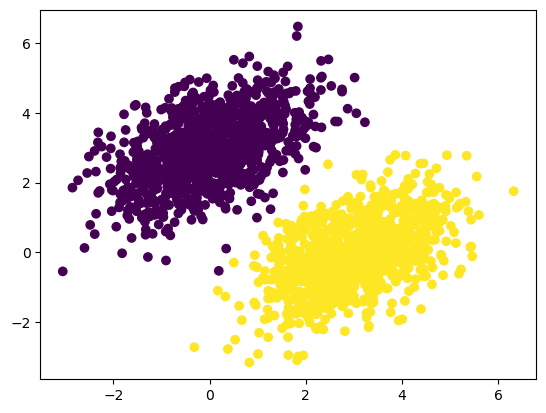

In [56]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:, 0] > 0.5)
plt.show()

Fundamentally, our predictions are linearly separated. What's the separating line? Well, if we start with our model equation:

<center>
    $\displaystyle w_{0}x + w_{1}y + b$,
</center>

we can note that it predicts the label $1$ when:

<center>
    $\displaystyle w_{0}x + w_{1}y + b \geq .5$,
</center>

and so the boundary line is:

<center>
    $\displaystyle w_{0}x + w_{1}y + b = .5$.
</center>

We can rewrite this in slope-intercept form as:

<center>
    $\displaystyle y = -\frac{w_{0}}{w_{1}}x + \frac{.5-b}{w_{1}}$.
</center>

Plotting this line against our initial labels we have:

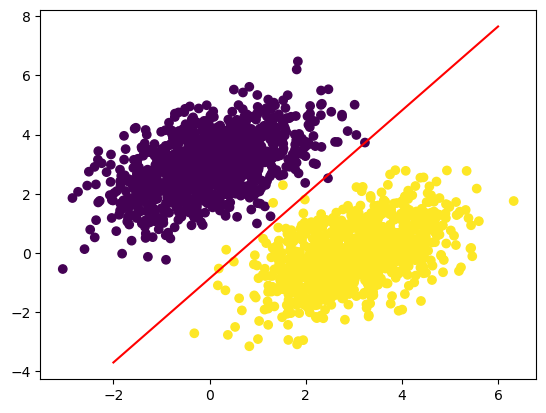

In [57]:
x = np.linspace(-2,6,200)
y = (-W[0] / W[1]) * x + (0.5-b) / W[1]
plt.plot(x,y,"-r")
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

Voila! A linear classifier. You move on in the interview.